# Visualize the dataset

In [21]:
# Import packages
from tqdm import tqdm
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
#!{sys.executable} -m pip install plotly

In [2]:
df = pd.read_csv('combined.csv',delimiter=",")
print(df.shape)
df.head()

(82076, 6)


,id,country,name,NACE,description,text
0,SE5560330788,SE,Geberit Production AB,2342.0,The globally operating Geberit Group is a Euro...,The globally operating Geberit Group is a Euro...
1,SE5569037251,SE,UMAB AB,7112.0,company should provide services within mechani...,company should provide services within mechani...
2,SE5592295116,SE,Proarch AB,7111.0,sell consulting services within real estate ar...,sell consulting services within real estate ar...
3,SE5590218375,SE,Double Duck AB,9003.0,aktiebolaget should conduct authoring activiti...,aktiebolaget should conduct authoring activiti...
4,DK32305148,DK,RØRVIG FISK'S FISKERESTAURANT ApS,5610.0,company purpose is to drive restaurant and sec...,company purpose is to drive restaurant and sec...


## Statistics

In [17]:
# Na-values
df.isna().sum()

id                0
country           0
name              0
NACE           5997
description    1822
text              4
dtype: int64

In [18]:
# Different countries
df['country'].unique()

array(['SE', 'DK', 'FI', 'NO', 'US', 'JP', 'CN', 'AU', 'GB', 'BM', 'CA',
       'AT', 'LU', 'IN', 'FR', 'IT', 'SG', 'JE', 'ID', 'TR', 'PL', 'TH',
       'BR', 'DE', 'IL', 'HK', 'CH', 'NZ', 'MX', 'BE', 'RU', 'IM', 'PT',
       'KR', 'MY', 'NL', 'ES', 'KY', 'EE', 'PA', 'IE', 'ZA', 'PH', 'VG',
       'GR', 'HU', 'LT', 'GG'], dtype=object)

In [16]:
# Duplicate IDs
len(df) - len(df.drop_duplicates(subset=['id'],keep='first'))

1130

-80946

## Word and Char count

In [9]:
def wordCount(text):
    num = len(str(text).split())
    return 100 if num > 100 else num

def charCount(text):
    num = len(str(text))
    return 1000 if num > 1000 else num

def countWordsAndCharacters(dataf):
    wc = []
    cc = []
    for _, row in dataf.iterrows():
        wc.append(wordCount(row['text']))
        cc.append(charCount(row['text']))
    return (wc,cc)


In [5]:
# Get median and mean of the number of words and characters
wc,cc = countWordsAndCharacters(df)

print("Num words has mean: {:.2f} and median: {:.0f} with std {:.2f}".format(np.mean(wc),np.median(wc),np.std(wc)))
print("Num chars has mean: {:.2f} and median: {:.0f} with std {:.2f}".format(np.mean(cc),np.median(cc),np.std(cc)))

Num words has mean: 39.48 and median: 22 with std 35.36
Num chars has mean: 346.54 and median: 150 with std 369.16


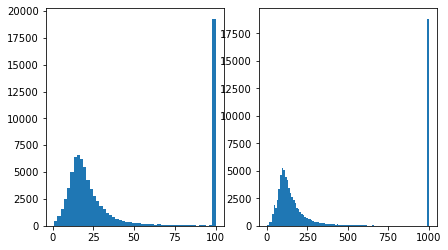

In [11]:
wc,cc = countWordsAndCharacters(df)

fig, axs = plt.subplots(1,2,figsize=(7,4))
axs[0].hist(wc, bins=50)
axs[1].hist(cc, bins=100)
plt.show()

## NACE codes

6    25076
4    19420
7    13240
n     5997
8     4933
5     4614
2     2812
9     2498
1     1906
3     1580
Name: NACE, dtype: int64


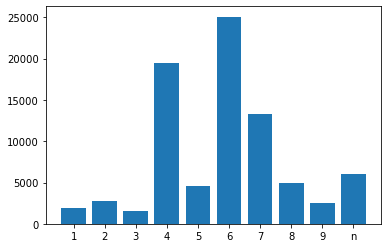

In [27]:
# Get how many companies have the same first number of NACE code, n=NaN
pivot = df['NACE'].astype(str).str[0].value_counts()
print(pivot)

a = sorted(zip(pivot.index,pivot.values))
plt.bar(list(zip(*a))[0],list(zip(*a))[1])
plt.show()

In [52]:
# Get how many companies have the same number of digits in their NACE code
pivot = list(df['NACE'].astype(str).str.len())

keys = set(pivot)
unique = dict(zip(keys, [0]*len(keys)))

for i in pivot:
    unique[i] += 1

# Nan values have length 3, others are on the format: '7022.0', '210.0'
print(unique)

{3: 5997, 5: 1355, 6: 74724}
